In [1]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import glob
from srspy import get_cropped_profile
from pathlib import Path

# Backscatter

In [2]:
data = sorted(glob.glob('AP_*.tif'))
data

['AP_18289_FBD_F7190_RT2_HH.tif', 'AP_18289_FBD_F7190_RT2_HV.tif']

In [3]:
with rasterio.open(data[0]) as ds:
    hh = ds.read(1)
    hh_profile = ds.profile

with rasterio.open(data[1]) as ds:
    hv = ds.read(1)
    hv_profile = ds.profile

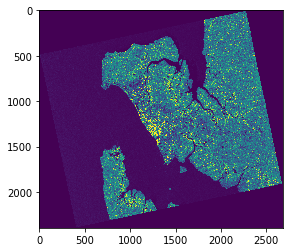

In [4]:
plt.imshow(hh, vmax=.5)

In [5]:
hh.shape

(2396, 2686)

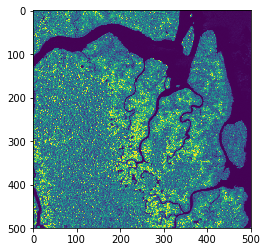

In [6]:
sy1 = np.s_[500:1000]
sx1 = np.s_[1200:1700]
plt.imshow(hh[sy1, sx1], vmax=.5)

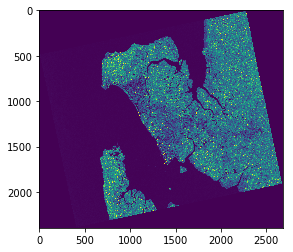

In [7]:
plt.imshow(hv, vmax=.15)

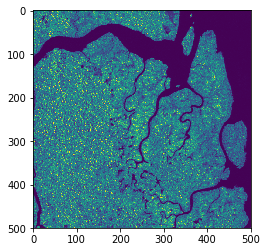

In [8]:
plt.imshow(hv[sy1, sx1], vmax=.15)

In [9]:
hh_profile_cropped = get_cropped_profile(hh_profile, sx1, sy1)
hv_profile_cropped = get_cropped_profile(hv_profile, sx1, sy1)

In [10]:
out_dir = Path('../data')
out_dir.mkdir(exist_ok=True)

In [11]:
with rasterio.open(out_dir/'alos_backscatter_hh.tif', 'w', **hh_profile_cropped) as ds:
    ds.write(hh[sy1, sx1], 1)
    
with rasterio.open(out_dir/'alos_backscatter_hv.tif', 'w', **hv_profile_cropped) as ds:
    ds.write(hv[sy1, sx1], 1)

# Coherence

In [12]:
data_coh = sorted(glob.glob('cohere*.tif'))
data_coh

['coherence_hh.tif', 'coherence_hv.tif']

In [13]:
with rasterio.open(data_coh[0]) as ds:
    coh_hh = ds.read(1)
    coh_hh_profile = ds.profile

with rasterio.open(data_coh[1]) as ds:
    coh_hv = ds.read(1)
    coh_hv_profile = ds.profile

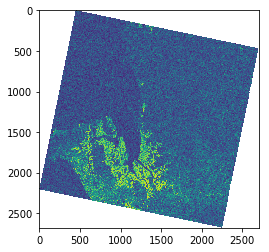

In [14]:
plt.imshow(coh_hv)

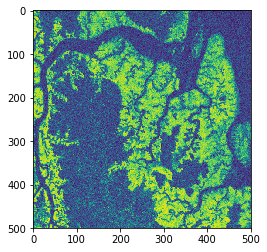

In [15]:
sy2 = np.s_[1500: 2000]
sx2 = np.s_[600:1100]
plt.imshow(coh_hh[sy2, sx2])

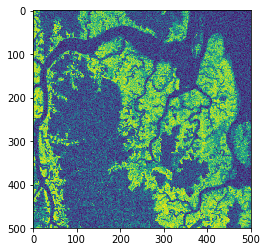

In [16]:
plt.imshow(coh_hv[sy2, sx2])

In [17]:
coh_hh_profile_cropped = get_cropped_profile(coh_hh_profile, sx2, sy2)
coh_hv_profile_cropped = get_cropped_profile(coh_hv_profile, sx2, sy2)

In [18]:
with rasterio.open(out_dir/'alos_coh_hh.tif', 'w', **coh_hh_profile_cropped) as ds:
    ds.write(coh_hh[sy2, sx2], 1)
    
with rasterio.open(out_dir/'alos_coh_hv.tif', 'w', **coh_hv_profile_cropped) as ds:
    ds.write(coh_hv[sy2, sx2], 1)